In [ ]:
!pip install pyupbit
!pip install datetime
!pip install numpy
!pip install pyjwt
!pip install datetime
!pip install schedule
!pip install Prophet

In [28]:
import pyupbit
import datetime
import time, calendar
import numpy as np
import datetime
import schedule
from fbprophet import Prophet

In [29]:
coin = "KRW-BTC" 

In [30]:
df_predict = pyupbit.get_ohlcv(coin, interval="minute60")
df_predict

df_predict = df_predict.reset_index()
df_predict['ds'] = df_predict['index']
df_predict['y'] = df_predict['close']
data_predict = df_predict[['ds','y']]
data_predict

,ds,y
0,2022-01-05 10:00:00,56385000.0
1,2022-01-05 11:00:00,56474000.0
2,2022-01-05 12:00:00,56532000.0
3,2022-01-05 13:00:00,56449000.0
4,2022-01-05 14:00:00,56325000.0
...,...,...
195,2022-01-13 13:00:00,53135000.0
196,2022-01-13 14:00:00,53124000.0
197,2022-01-13 15:00:00,53144000.0
198,2022-01-13 16:00:00,53170000.0


In [31]:
model = Prophet()
model.fit(data_predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [32]:
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

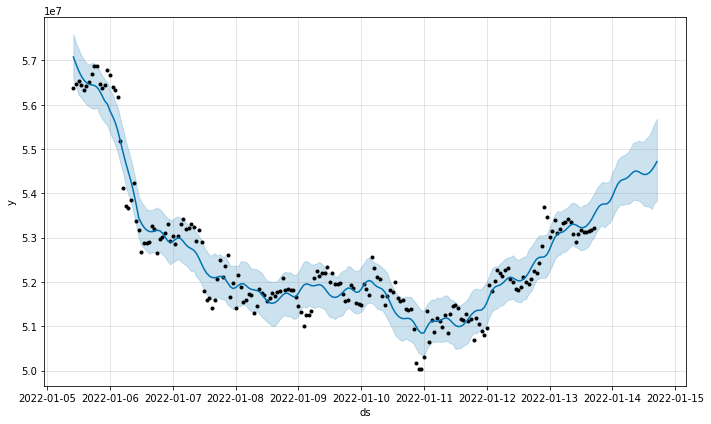

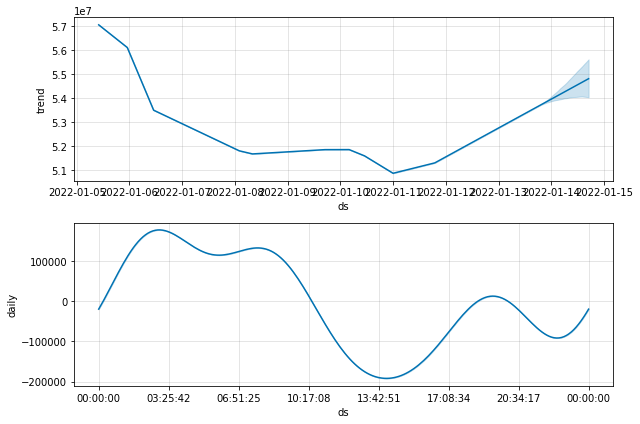

In [33]:
#그래프1
fig1 = model.plot(forecast)
#그래프2
fig2 = model.plot_components(forecast)